In [129]:
%matplotlib inline

import numpy as np

In [130]:
epsilon = 0.001
domain = np.arange(-pi/2., pi/2.0, epsilon)
print type(domain)

<type 'numpy.ndarray'>


In [131]:
bins = domain.shape[0]
scale = float(bins)
blueRange = np.zeros(bins)
redRange = np.zeros(bins)

print redRange.shape

# print domain.ndim

(3142L,)


In [132]:
def index(wavelength):
    if (wavelength < 400.0): return
    if (wavelength > 700.0): return
    ind400 = 1.339
    ind700 = 1.331
    deltaind = ind700 - ind400
    deltawavefraction = (wavelength - 400.0)/300.0
    return (deltaind * deltawavefraction) + ind400


In [133]:
def dropangle(y, wavelength):
    if (y < 0.0):
        return
    elif (y > 1.0): 
        return
    indWater = index(wavelength)
    indAir = 1.00029
    theta1 = np.arcsin(y)
    theta2 = np.arcsin(np.sin(theta1)*(indAir/indWater))
    return 4.0*theta2-2.0*theta1


In [134]:
def getbin(theta):
    if (theta < -np.pi/2.0): return
    if (theta > np.pi/2.0): return
    
    bin = int((theta+np.pi/2.0)*(scale/np.pi))
    if (bin >= 0 and bin < bins):
        return bin


In [135]:
# sin theta-new / sin theta-old = index-old / index-new
def getThetaWater(thetaAir, indexAir, indexWater):
    term = (indexAir / indexWater) * sin(thetaAir)
    return arcsin(term)

In [136]:
# Same as above but reversing the calculation
def getThetaAir(thetaWater, indexWater, indexAir):
    term = (indexWater / indexAir) * sin(thetaWater)
    return arcsin(term)

In [137]:
# Snell's law generalization to incident and transmission media
def snell(thetaInc, indexInc, indexTrans):
    return arcsin((indexInc/indexTrans)*sin(thetaInc))

In [138]:
# you just know this already exists
def rtd(theta): return theta*180.0/pi

In [139]:
# you just know this already exists
def dtr(theta): return theta*pi/180.0

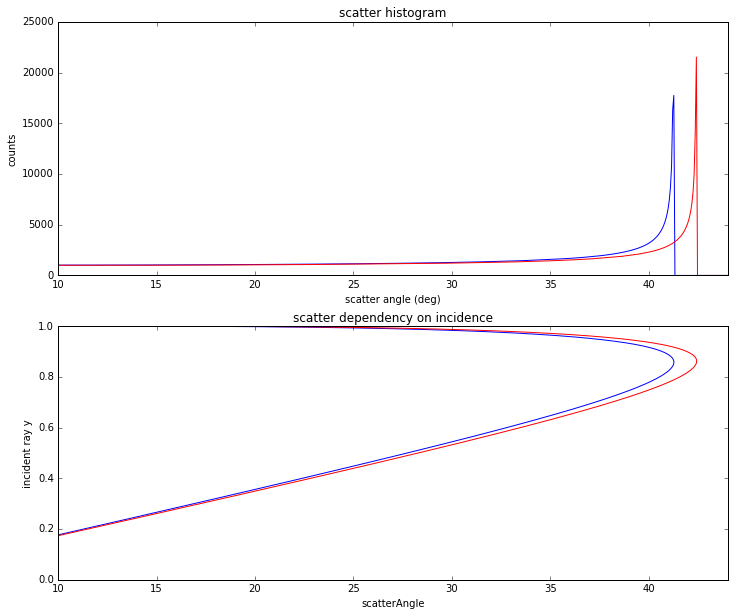

In [140]:
yIncident = []
angleRedDeg = []
angleBlueDeg = []

fig, axes = plt.subplots(2, figsize=(12,10))
ax0 = axes[0]
ax1 = axes[1]

for y in np.arange(0.0,1.0, 0.000001):
    yIncident.append(y)
    thetaRed = dropangle(y, 700.0)
    thetaBlue = dropangle(y, 400.0)
    angleRedDeg.append(rtd(thetaRed))
    angleBlueDeg.append(rtd(thetaBlue))
    redBin = getbin(thetaRed)
    blueBin = getbin(thetaBlue)
    if blueBin >= 0 and blueBin < bins: blueRange[blueBin] += 1.0
    if redBin >= 0 and redBin < bins: redRange[redBin] += 1.0
  
# print type(domain)
# print type(histogram)
# plt.plot(domain, histogram)

domainDegrees = domain * 180.0 / pi

ax0.plot(domainDegrees, blueRange, 'b')
ax0.plot(domainDegrees, redRange, 'r')
ax0.set(xlim=(10.0, 44.0))
ax0.set(xlabel='scatter angle (deg)', ylabel = 'counts', title='scatter histogram')

ax1.plot(angleBlueDeg, yIncident, 'b')
ax1.plot(angleRedDeg, yIncident, 'r')
ax1.set(xlim=(10.0, 44.0))
ax1.set(ylabel='incident ray y', xlabel = 'scatterAngle', title='scatter dependency on incidence')



In [141]:

maxRedIndex = np.where(redRange == redRange.max())[0][0]
maxBlueIndex = np.where(blueRange == blueRange.max())[0][0]
redMaxAngleDegrees = domain[maxRedIndex]*180.0/np.pi
blueMaxAngleDegrees = domain[maxBlueIndex]*180.0/np.pi

redMAD2 = round(redMaxAngleDegrees, 2)
blueMAD2 = round(blueMaxAngleDegrees, 2)
print 'red:', redRange.max(),', index', maxRedIndex, '     angle:', redMaxAngleDegrees
print 'blue:', blueRange.max(),', index', maxBlueIndex, '     angle:', blueMaxAngleDegrees
print 'Wikipedia rainbow is 42.00 - 40.89 =', 42.00 - 40.89, 'degrees wide'
print 'This rainbow is', redMAD2, '-', blueMAD2, '=', round(redMaxAngleDegrees - blueMaxAngleDegrees, 2), 'degrees wide'

# 40.89 to 42 (red) is 1.11 degrees (Wikipedia article on rainbows)
# My rainbow is 1.146 degrees wide


red: 21527.0 , index 2311      angle: 42.4105464547
blue: 17744.0 , index 2291      angle: 41.2646308645
Wikipedia rainbow is 42.00 - 40.89 = 1.11 degrees wide
This rainbow is 42.41 - 41.26 = 1.15 degrees wide


In [123]:
# Path 1 is along the edges... very long!
p1 = 3 + 0.5
print p1


3.5


In [124]:
# path 2 is two diagonals: across the 1-dot face and across the 2-dot face
p2 = np.sqrt(2) + np.sqrt(5)/2.0
print p2


2.53224755112


In [125]:
# path 3 is a long diagonal across face 1-dot, 3-dot and 2-dot
p3 = 5.0 / 2.0
print p3

2.5


In [126]:
# path 4 is another diagonal that goes across face 1-dot and face 2-dot (but the other version of face 2-dot)
p4 = np.sqrt(17.0)/2.0
print p4
print p3

2.06155281281
2.5


In [127]:
# deprecated combination of stateful and object interfaces
# import matplotlib.pyplot as plt
# circle1=plt.Circle((0,0), 1.0, color='k', fill=False)
# circle2=plt.Circle((.5,.5),.2,color='b')
# circle3=plt.Circle((1,1),.2,color='g',clip_on=False)
# fig = plt.figure()
# fig.gca().add_artist(circle1)
# plt.axis('equal') # Hah! The aspect ratio is ok
# plt.xlim(-2, 2)

# Intellisense-ish: plt. and then press tab...
# np.linspace() and inside the parens shift-tab to see the arg list; and shift-tab twice for extended summary
# and shift-tab four times to pop that out. 
# plt is a stateful interface: current figure, axis and so on; so plt.X can change state
# Try plt.plot?? getting the source code...
# Try plt.plot? getting the documentation
# gca means get current axis
# fig.gca().add_artist(circle2)
# fig.gca().add_artist(circle3)
# fig.savefig('plotcircles.png')

0.0
26.9991549041


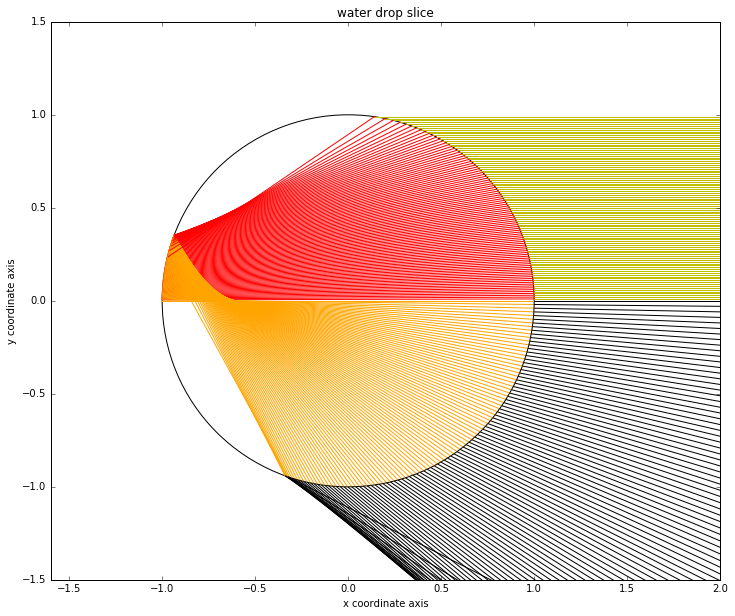

In [128]:
# let's do this the object way
%matplotlib inline

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12,10))

# now we say that 'fig' is the overall canvas
# ax is the (list of) axes
# after this we leave fig alone and just use ax

# figure contains a bunch of axes (subplots(7)) and axis contains a bunch of artists

# How can we make the figure larger? 
# fig.set_figure()
# plt.figure(figsize=(12,12))
# fig = plt.figure(figsize=(12,10))

# a patch is a filled shape
# from matplotlib import patches
# patches.<tab> shows you them
ax.add_patch(plt.Circle((0, 0), 1, color = 'k', fill=False))

# Drawing a distant circle as the proxy for many observing eyes (ejected ray endpoint)
radiusCircleAtInf = 2.0
# ax.add_patch(plt.Circle((0, 0), radiusCircleAtInf, color = 'k', fill=False))

# unity aspect ratio
ax.axis('equal')

# How To note...
# ax.set_xlim(-7, 7)
# ax.set_ylim(-7, 7)

ax.set(xlim=(-1.1, 1.5), ylim=(-1.5,1.5))
ax.set(xlabel='x coordinate axis', ylabel = 'y coordinate axis', title='water drop slice')

yInterval = 0.01
wavelength = 400.0
iorWater = index(wavelength)
iorAir = indAir = 1.00029

for y0 in arange(0.0, 1.0, yInterval):
    # (x0, y0) is the point off at + infinity where one of the parallel rays comes in from
    x0 = 3.0

    # (x, y) is the point at which a ray intersects the surface of the droplet (radius = 1)
    # Call this point P
    # Call the center of the circle/sphere point C
    # Call (1, 0) the point U (for Unit). It is a convenient reference point.
    y = y0
    x  = np.sqrt(1.0-y*y)
    
    # here is our incident ray
    ax.plot([x0, x], [y, y], color='y')
    
    # Take out the radial lines to reduce clutter
    # ax.plot([0.0, x], [0.0, y], color='g')
    
    # incidenceAngle1 is measured relative to the circle (sphere) normal at (x, y)
    incidenceAngle1 = arctan2(y, x)
    
    # angleWater is the refracted angle: Bending in towards the normal line
    angleWater = snell(incidenceAngle1, iorAir, iorWater)
    
    # the ray will deflect and strike the far wall of the droplet at point Q
    # internal1 = angle QCP (a positive value; from isoscelesiness)
    internal1 = pi - 2*angleWater
    
    # internalTotal1 = angle QCU
    internalTotal1 = internal1 + incidenceAngle1
    
    # Q = (x2, y2)
    x2 = cos(internalTotal1)
    y2 = sin(internalTotal1)
    
    # Now draw the first leg of the journey inside the water drop
    ax.plot([x2, x], [y2, y], color='r')
    
    # The light reflects at Q using angle(incidence) = angle(reflection)
    # It will strike the surface of the droplet at point R
    # internal2 = angle QCR
    internal2 = pi - 2*angleWater              # the same as internal1!
    
    # internalTotal2 = RCU measured as positive from R clockwise to U
    internalTotal2 = internalTotal1 + internal2
    
    # R = (x3, y3)
    x3 = cos(internalTotal2)
    y3 = sin(internalTotal2)
    
    # Draw the second part of the path through the drop
    ax.plot([x2, x3], [y2, y3], color='orange')
    # print rtd(angleWater)
    
    # externalTotal is the angle UCR measured from U clockwise to R 
    # It is 'external' because this angle is the angle of the normal at R
    externalTotal = 2*pi - internalTotal2
    
    # The rays will escape in some direction and intersect the outer circle of radius 'large'. 
    # S = the point of intersection with outer circle
    # S = (x4, y4)
    
    # incidenceAngle2 = the incidence angle at R relative to the normal
    incidenceAngle2 = (pi - internal2)/2.
    
    # external = the transmission angle at R relative to the normal
    external = snell(incidenceAngle2, iorWater, iorAir)
    
    # ejectAngle is the angle at which the ray is ejected from the drop
    #   measured relative to the +x-axis direction. It will tend to be
    #   sign-changed in subsequent calculations.
    ejectAngle = externalTotal - external
    
    # Now we have triangle CRS from the center to the eject point R to the intersection
    #   of the ejected ray with Circle(radius 2) at point S. We need the coordinates of 
    #   S now. We could use a very large circle centered on R as an approximation for a
    #   very large circle centered at the origin C...
    radiusLarge = 1000.0
    x4 = radiusLarge * cos(-ejectAngle)
    y4 = radiusLarge * sin(-ejectAngle)
    ax.plot([x3, x4], [y3, y4], 'k')
    
    if y0 == 0.0: print rtd(ejectAngle)

print rtd(ejectAngle)

# python data science handbook (o'reilly)
